# Machine Learning (SVM & Random Forest)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_validate
import seaborn as sn
import matplotlib.pyplot as plt
import graphviz
#pd.set_option('display.max_rows', 500)

#### Import dataset

In [2]:
ngs_reads = pd.read_json('exported_datasets/sau_simple.json')

In [3]:
ngs_reads.reset_index(drop=True, inplace=True)

In [4]:
# convert dict type columns to dataframes
for category in ngs_reads:
    if type(ngs_reads[category][0]) is dict:
        ngs_reads[category] = ngs_reads[category].apply(pd.DataFrame)

In [5]:
ngs_reads.columns

Index(['organism', 'technology', 'read_number', 'evaluation',
       'total_sequences', 'percent_gc', 'min_sequence_length',
       'max_sequence_length', 'module_1_status', 'module_2_status',
       'module_3_status', 'module_4_status', 'module_5_status',
       'module_6_status', 'module_7_status', 'module_8_status',
       'module_9_status', 'module_10_status'],
      dtype='object')

#### extract target variable

In [6]:
target = ngs_reads.evaluation.values
ngs_reads.drop(columns='evaluation', inplace=True)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### remove unused columns from dataset

In [7]:
ngs_reads.drop(columns=['organism', 'technology', 'read_number'], inplace=True)
ngs_reads

,total_sequences,percent_gc,min_sequence_length,max_sequence_length,module_1_status,module_2_status,module_3_status,module_4_status,module_5_status,module_6_status,module_7_status,module_8_status,module_9_status,module_10_status
0,511669,34,35,301,0,2,2,0,2,2,1,2,2,2
1,220494,34,35,301,2,1,2,0,2,2,1,2,2,2
2,6015314,65,35,301,0,1,2,0,1,2,1,1,2,2
3,1916272,35,35,301,2,2,2,0,2,2,1,1,2,2
4,334,35,69,301,0,0,2,0,0,2,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1210750,34,35,251,2,2,2,0,2,2,1,1,2,2
74,1323948,34,35,251,2,2,2,0,2,2,1,1,2,2
75,1269962,34,35,251,2,2,2,0,2,2,1,1,2,2
76,1210750,34,35,251,2,2,2,0,2,2,1,1,2,2


#### train-test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(ngs_reads, target, test_size=0.3, random_state=109)

#### Confusion Matrix Heatmap Training Set

<AxesSubplot:>

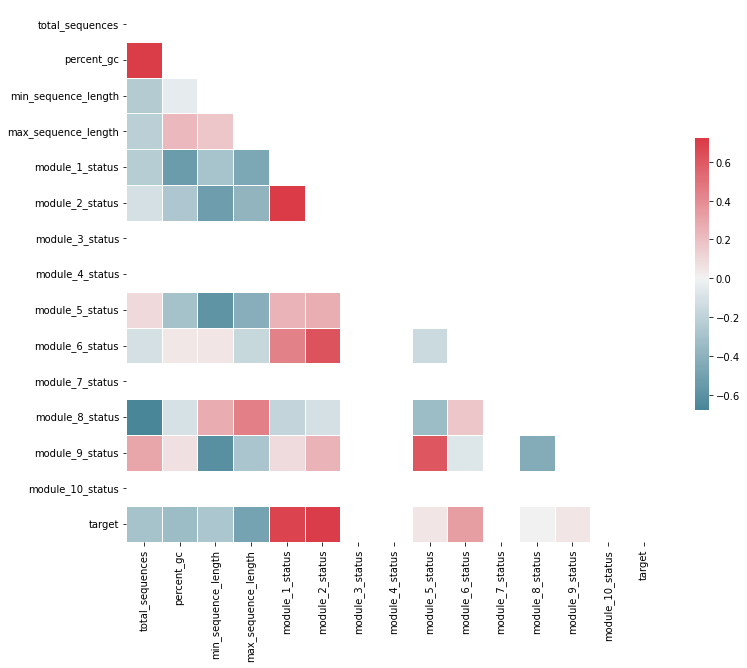

In [9]:
train = X_train.copy()
train.loc[:, 'target'] = y_train.tolist()
train

corr_matrix = train.corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

#### Support Vector Machine Training

In [10]:
clf_svc = svm.SVC(kernel='linear')

In [11]:
clf_svc.fit(X_train, y_train)

SVC(kernel='linear')

##### SVM performance

In [12]:
y_pred=clf_svc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7083333333333334
Precision:  0.8666666666666667
Recall:  0.7222222222222222
F1 Score:  0.7878787878787877


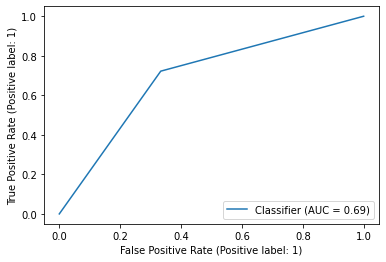

In [13]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### SVM with Cross Validation

In [14]:
clf_svm_cv = svm.SVC(kernel='linear')
scores = cross_validate(clf_svm_cv, ngs_reads, target, cv=5, 
                        scoring=('accuracy', 'precision', 'recall', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("Precision: ", scores['test_precision'])
print("Recall: ", scores['test_recall'])
print("F1 Scores: ", scores['test_f1'])

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("Precision: %0.2f +/- %0.2f" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Recall: %0.2f +/- %0.2f" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [0.8125     0.625      0.3125     0.4        0.93333333]
Precision:  [0.78571429 0.69230769 0.5        0.66666667 1.        ]
Recall:  [1.         0.81818182 0.18181818 0.2        0.90909091]
F1 Scores:  [0.88       0.75       0.26666667 0.30769231 0.95238095]
Accuracy: 0.62 +/- 0.24
Precision: 0.73 +/- 0.16
Recall: 0.62 +/- 0.36
F1 Score: 0.63 +/- 0.29


#### Decision Tree

In [15]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

In [16]:
y_pred = clf_dt.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


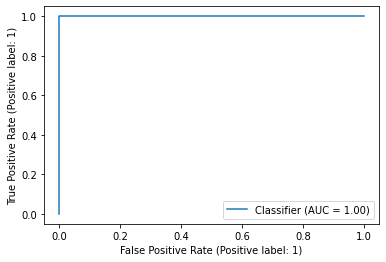

In [17]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

[Text(0.2, 0.9285714285714286, 'module_2_status <= 1.5\ngini = 0.444\nsamples = 54\nvalue = [18, 36]\nclass = good'),
 Text(0.1, 0.7857142857142857, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = ugly'),
 Text(0.3, 0.7857142857142857, 'module_8_status <= 0.5\ngini = 0.245\nsamples = 42\nvalue = [6, 36]\nclass = good'),
 Text(0.2, 0.6428571428571429, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = ugly'),
 Text(0.4, 0.6428571428571429, 'module_1_status <= 0.5\ngini = 0.142\nsamples = 39\nvalue = [3, 36]\nclass = good'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ugly'),
 Text(0.5, 0.5, 'total_sequences <= 545333.0\ngini = 0.1\nsamples = 38\nvalue = [2, 36]\nclass = good'),
 Text(0.3, 0.35714285714285715, 'module_5_status <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = good'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = good'),
 Text(0.4, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = u

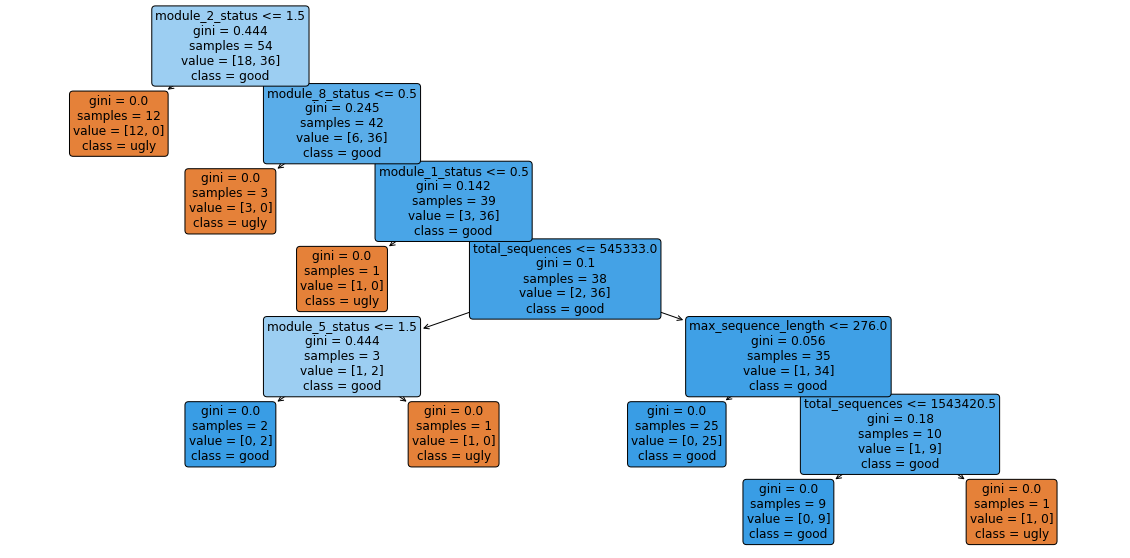

In [18]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_dt, 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

In [19]:
len(target)

78

In [20]:
clf_dt_cv = tree.DecisionTreeClassifier()
scores = cross_validate(clf_dt_cv, ngs_reads, target, cv=10, 
                        scoring=('accuracy', 'precision', 'recall', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("Precision: ", scores['test_precision'])
print("Recall: ", scores['test_recall'])
print("F1 Scores: ", scores['test_f1'])

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("Precision: %0.2f +/- %0.2f" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Recall: %0.2f +/- %0.2f" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [1.    1.    0.875 1.    0.75  1.    1.    1.    1.    1.   ]
Precision:  [1.   1.   1.   1.   0.75 1.   1.   1.   1.   1.  ]
Recall:  [1.  1.  0.8 1.  1.  1.  1.  1.  1.  1. ]
F1 Scores:  [1.         1.         0.88888889 1.         0.85714286 1.
 1.         1.         1.         1.        ]
Accuracy: 0.96 +/- 0.08
Precision: 0.97 +/- 0.07
Recall: 0.98 +/- 0.06
F1 Score: 0.97 +/- 0.05


#### Random Forest Training

In [21]:
clf_rf=RandomForestClassifier(n_estimators=100, verbose=True)

In [22]:
clf_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(verbose=True)

##### Random Forest performance

In [23]:
y_pred = clf_rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


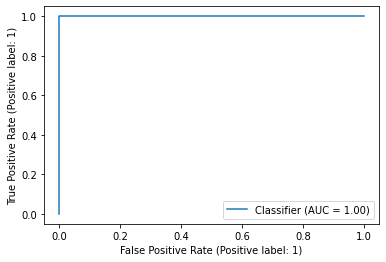

In [24]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

#### Feature Importance Random Forest

Text(0.5, 0, 'Relative Importance')

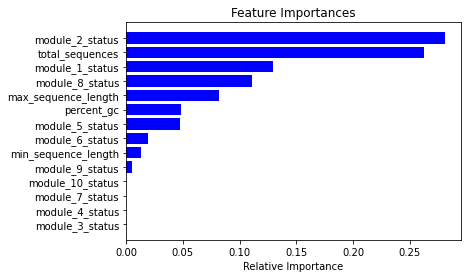

In [25]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), X_train.columns[indices])
plt.xlabel('Relative Importance')

#### Random Forest with Cross Validation

In [26]:
clf_rf_cv = RandomForestClassifier(n_estimators=100)
scores = cross_validate(clf_rf_cv, ngs_reads, target, cv=10, 
                        scoring=('accuracy', 'precision', 'recall', 'f1'), return_train_score=True)
print("Accuracies: ", scores['test_accuracy'])
print("Precision: ", scores['test_precision'])
print("Recall: ", scores['test_recall'])
print("F1 Scores: ", scores['test_f1'])

print("Accuracy: %0.2f +/- %0.2f" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()))
print("Precision: %0.2f +/- %0.2f" % (scores['test_precision'].mean(), scores['test_precision'].std()))
print("Recall: %0.2f +/- %0.2f" % (scores['test_recall'].mean(), scores['test_recall'].std()))
print("F1 Score: %0.2f +/- %0.2f" % (scores['test_f1'].mean(), scores['test_f1'].std()))

Accuracies:  [1.    1.    0.875 1.    1.    1.    1.    1.    1.    1.   ]
Precision:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Recall:  [1.  1.  0.8 1.  1.  1.  1.  1.  1.  1. ]
F1 Scores:  [1.         1.         0.88888889 1.         1.         1.
 1.         1.         1.         1.        ]
Accuracy: 0.99 +/- 0.04
Precision: 1.00 +/- 0.00
Recall: 0.98 +/- 0.06
F1 Score: 0.99 +/- 0.03


#### Visualize some trees of the Random Forest

[Text(0.2222222222222222, 0.9285714285714286, 'module_2_status <= 1.5\ngini = 0.417\nsamples = 35\nvalue = [16, 38]\nclass = good'),
 Text(0.1111111111111111, 0.7857142857142857, 'gini = 0.0\nsamples = 9\nvalue = [10, 0]\nclass = ugly'),
 Text(0.3333333333333333, 0.7857142857142857, 'module_8_status <= 0.5\ngini = 0.236\nsamples = 26\nvalue = [6, 38]\nclass = good'),
 Text(0.2222222222222222, 0.6428571428571429, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]\nclass = ugly'),
 Text(0.4444444444444444, 0.6428571428571429, 'module_5_status <= 1.5\ngini = 0.136\nsamples = 24\nvalue = [3, 38]\nclass = good'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [0, 17]\nclass = good'),
 Text(0.5555555555555556, 0.5, 'max_sequence_length <= 276.0\ngini = 0.219\nsamples = 15\nvalue = [3, 21]\nclass = good'),
 Text(0.4444444444444444, 0.35714285714285715, 'gini = 0.0\nsamples = 12\nvalue = [0, 20]\nclass = good'),
 Text(0.6666666666666666, 0.35714285714285715, 'module_1_status <= 1.0\ngi

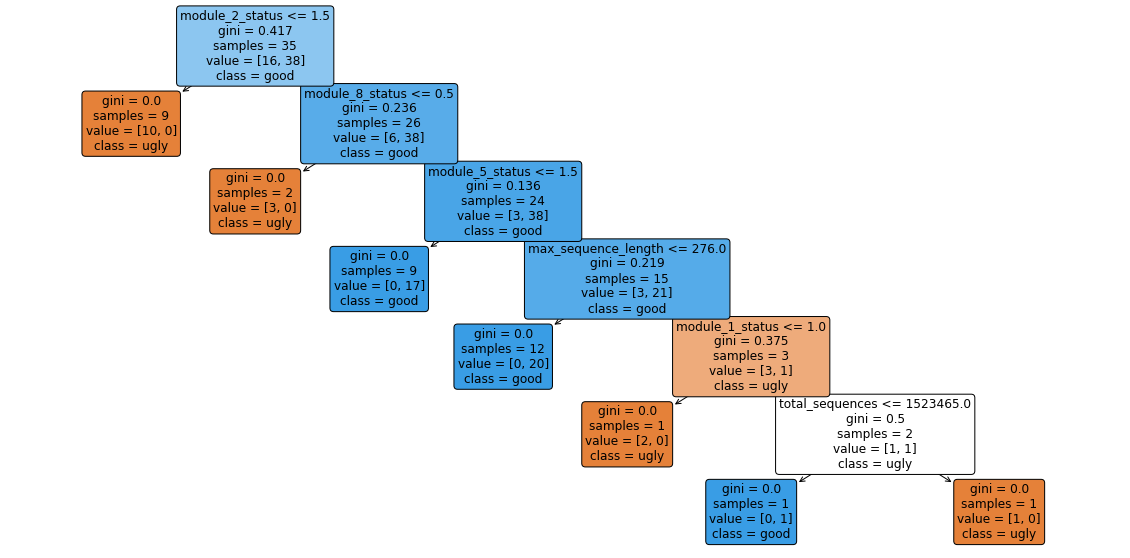

In [27]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[0], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

[Text(0.2857142857142857, 0.9375, 'total_sequences <= 572181.5\ngini = 0.417\nsamples = 34\nvalue = [16, 38]\nclass = good'),
 Text(0.14285714285714285, 0.8125, 'module_2_status <= 1.5\ngini = 0.165\nsamples = 7\nvalue = [10, 1]\nclass = ugly'),
 Text(0.07142857142857142, 0.6875, 'gini = 0.0\nsamples = 6\nvalue = [10, 0]\nclass = ugly'),
 Text(0.21428571428571427, 0.6875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = good'),
 Text(0.42857142857142855, 0.8125, 'module_2_status <= 1.5\ngini = 0.24\nsamples = 27\nvalue = [6, 37]\nclass = good'),
 Text(0.35714285714285715, 0.6875, 'gini = 0.0\nsamples = 3\nvalue = [4, 0]\nclass = ugly'),
 Text(0.5, 0.6875, 'max_sequence_length <= 201.0\ngini = 0.097\nsamples = 24\nvalue = [2, 37]\nclass = good'),
 Text(0.42857142857142855, 0.5625, 'gini = 0.0\nsamples = 12\nvalue = [0, 19]\nclass = good'),
 Text(0.5714285714285714, 0.5625, 'max_sequence_length <= 276.0\ngini = 0.18\nsamples = 12\nvalue = [2, 18]\nclass = good'),
 Text(0.428571428571428

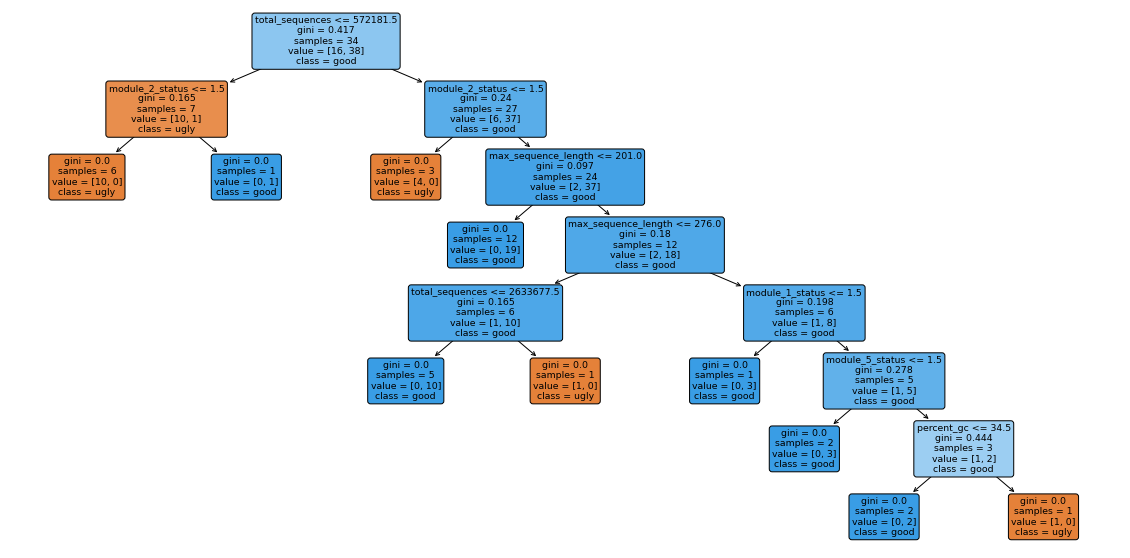

In [28]:
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(clf_rf.estimators_[12], 
          feature_names=ngs_reads.columns,
          class_names=['ugly', 'good'], 
          filled=True, impurity=True, 
          rounded=True)

#### Other Classification Algorithms

Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
clf_lg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [30]:
y_pred = clf_lg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.75
Precision:  0.75
Recall:  1.0
F1 Score:  0.8571428571428571


Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB().fit(X_train, y_train)

In [32]:
y_pred = clf_gnb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.875
Precision:  0.8571428571428571
Recall:  1.0
F1 Score:  0.923076923076923


K Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9166666666666666
Precision:  0.9
Recall:  1.0
F1 Score:  0.9473684210526316
